In [2]:
import pandas as pd

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv("guna.txt",header=None,encoding='utf8')

In [5]:
df

,0,1
0,24/09/2025,10:02 am - Guna: <Media omitted>
1,24/09/2025,10:15 am - Baby Ma😘: Thank you
2,24/09/2025,10:16 am - Baby Ma😘: Ok panitagala
3,24/09/2025,10:17 am - Guna: Mail panniruken
4,24/09/2025,10:17 am - Guna: Will see
...,...,...
112,18/12/2025,5:46 pm - Guna: Mm
113,20/12/2025,4:38 pm - Baby Ma😘: Hi
114,20/12/2025,4:38 pm - Baby Ma😘: Fees potagala unakaluku
115,20/12/2025,4:49 pm - Guna: Haan update aagiduchu


In [6]:
df=df.drop(0)
df.columns=['date','chat']
message=df["chat"].str.split("-",n=1,expand=True)
df["time"]=message[0]
message1=message[1].str.split(":",n=1,expand=True)
df["name"]=message1[0]
df["chat"]=message1[1]
df=df[["date","time","name","chat"]]
df

,date,time,name,chat
1,24/09/2025,10:15 am,Baby Ma😘,Thank you
2,24/09/2025,10:16 am,Baby Ma😘,Ok panitagala
3,24/09/2025,10:17 am,Guna,Mail panniruken
4,24/09/2025,10:17 am,Guna,Will see
5,24/09/2025,10:17 am,Baby Ma😘,Ok
...,...,...,...,...
112,18/12/2025,5:46 pm,Guna,Mm
113,20/12/2025,4:38 pm,Baby Ma😘,Hi
114,20/12/2025,4:38 pm,Baby Ma😘,Fees potagala unakaluku
115,20/12/2025,4:49 pm,Guna,Haan update aagiduchu


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 1 to 116
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    116 non-null    object
 1   time    116 non-null    object
 2   name    116 non-null    object
 3   chat    116 non-null    object
dtypes: object(4)
memory usage: 3.8+ KB


In [8]:
#!pip install nltk

In [9]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [10]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Techs\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [11]:
dataset=df

In [12]:
dataset.dropna(inplace=True)

In [13]:
sid=SentimentIntensityAnalyzer()

In [14]:
senti=sid.polarity_scores(dataset['chat'][4])

In [15]:
senti

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [16]:
def sentimentalAnalysis(data, columnname):

    # downloading vader_lexicon for the process
    import matplotlib.pyplot as plt
    import seaborn as sns
    "Importing Necessary Packeage"
    from nltk.sentiment.vader import SentimentIntensityAnalyzer
    sid = SentimentIntensityAnalyzer()

    "Deleting null pr empty value"
    data.dropna(inplace=True)

    "checking for a comment"
    # sid.polarity_scores(data[columnname][93])

    "Creating respective columns"

    data['scores'] = data[columnname].apply(lambda commentText: sid.polarity_scores(commentText))
    data['compound'] = data['scores'].apply(lambda score_dict: score_dict['compound'])
    data['Negtive'] = data['scores'].apply(lambda score_dict: score_dict['neg'])
    data['Postive'] = data['scores'].apply(lambda score_dict: score_dict['pos'])
    data['Neutral'] = data['scores'].apply(lambda score_dict: score_dict['neu'])

    "Creating final pos or neg using compound score"
    data['comp_score'] = data['compound'].apply(lambda c: 'pos' if c >= 0 else 'neg')
    
    plt.clf()
    
    # comp = sns.countplot(x='comp_score', hue='Name', data=data, palette='magma')
    # comp.figure.savefig("date_charts.png")
    
    "Checking how many pos and neg"
    posneg = pd.DataFrame(data['comp_score'].value_counts())
    
    return posneg, data

In [17]:
pos,data_senti=sentimentalAnalysis(dataset,columnname='chat')

<Figure size 640x480 with 0 Axes>

In [18]:
data_senti

,date,time,name,chat,scores,compound,Negtive,Postive,Neutral,comp_score
1,24/09/2025,10:15 am,Baby Ma😘,Thank you,"{'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'comp...",0.3612,0.0,0.714,0.286,pos
2,24/09/2025,10:16 am,Baby Ma😘,Ok panitagala,"{'neg': 0.0, 'neu': 0.312, 'pos': 0.688, 'comp...",0.2960,0.0,0.688,0.312,pos
3,24/09/2025,10:17 am,Guna,Mail panniruken,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.0,0.000,1.000,pos
4,24/09/2025,10:17 am,Guna,Will see,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.0,0.000,1.000,pos
5,24/09/2025,10:17 am,Baby Ma😘,Ok,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.2960,0.0,1.000,0.000,pos
...,...,...,...,...,...,...,...,...,...,...
112,18/12/2025,5:46 pm,Guna,Mm,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.0,0.000,1.000,pos
113,20/12/2025,4:38 pm,Baby Ma😘,Hi,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.0,0.000,1.000,pos
114,20/12/2025,4:38 pm,Baby Ma😘,Fees potagala unakaluku,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.0,0.000,1.000,pos
115,20/12/2025,4:49 pm,Guna,Haan update aagiduchu,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.0,0.000,1.000,pos


In [19]:
pos

,count
comp_score,
pos,114
neg,2


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
tfidf= TfidfVectorizer(max_df=0.95,min_df=2,stop_words='english') #common used words remove it
dtm=tfidf.fit_transform(df["chat"])

In [22]:
from sklearn.decomposition import NMF
nmf_model=NMF(n_components=5,random_state=42)
nmf_model.fit(dtm)

,n_components,5
,init,None
,solver,'cd'
,beta_loss,'frobenius'
,tol,0.0001
,max_iter,200
,random_state,42
,alpha_W,0.0
,alpha_H,'same'
,l1_ratio,0.0
,verbose,0


In [23]:
for index,topic in enumerate(nmf_model.components_):
    results=([tfidf.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print(results)

['pannunga', 'soluvaga', 'enaku', 'correction', 'apdiya', 'negalum', 'okay', 'sonaga', 'send', 'mm']
['okok', 'work', 'start', 'pannla', 'innum', 'paakanum', 'thaan', 'hi', 'sonaga', 'ok']
['send', 'innum', 'varan', 'panuga', 'edited', 'na', 'deleted', 'message', 'media', 'omitted']
['ena', 'mangai', 'vcf', 'file', 'attached', 'nega', 'ila', 'okay', 'paka', 'mam']
['pannla', 'send', 'innum', 'varan', 'panuga', 'edited', 'na', 'deleted', 'message', 'thank']


In [29]:
topic_results=nmf_model.transform(dtm)
df["Topic"]=topic_results.argmax(axis=1)

In [31]:
df

,date,time,name,chat,scores,compound,Negtive,Postive,Neutral,comp_score,Topic
1,24/09/2025,10:15 am,Baby Ma😘,Thank you,"{'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'comp...",0.3612,0.0,0.714,0.286,pos,4
2,24/09/2025,10:16 am,Baby Ma😘,Ok panitagala,"{'neg': 0.0, 'neu': 0.312, 'pos': 0.688, 'comp...",0.2960,0.0,0.688,0.312,pos,1
3,24/09/2025,10:17 am,Guna,Mail panniruken,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.0,0.000,1.000,pos,3
4,24/09/2025,10:17 am,Guna,Will see,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.0,0.000,1.000,pos,0
5,24/09/2025,10:17 am,Baby Ma😘,Ok,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.2960,0.0,1.000,0.000,pos,1
...,...,...,...,...,...,...,...,...,...,...,...
112,18/12/2025,5:46 pm,Guna,Mm,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.0,0.000,1.000,pos,0
113,20/12/2025,4:38 pm,Baby Ma😘,Hi,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.0,0.000,1.000,pos,4
114,20/12/2025,4:38 pm,Baby Ma😘,Fees potagala unakaluku,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.0,0.000,1.000,pos,0
115,20/12/2025,4:49 pm,Guna,Haan update aagiduchu,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.0,0.000,1.000,pos,0


In [33]:
df["Topic"].value_counts()

Topic
0    47
3    32
4    15
1    13
2     9
Name: count, dtype: int64

In [34]:
#!pip install wordcloud matplotlib

In [43]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

In [44]:
df['chat']=df['chat'].astype(str)
text=" ".join(df['chat'])

In [45]:
wc=WordCloud(width=800,height=400,background_color='white',stopwords=STOPWORDS).generate(text)

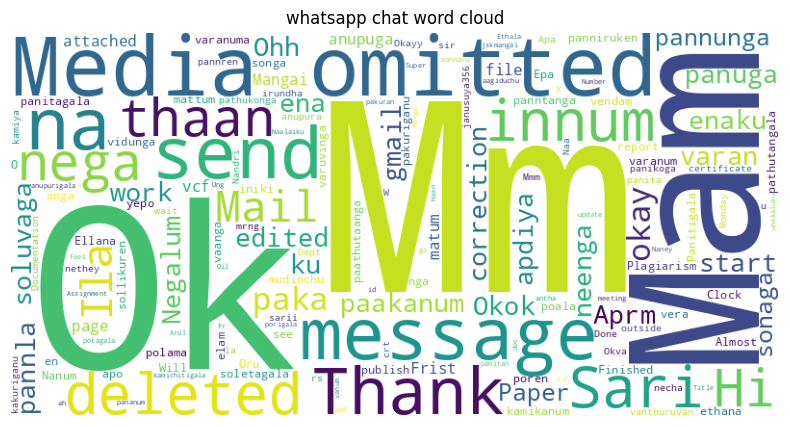

In [51]:
plt.figure(figsize=(10,5))
plt.imshow(wc)
plt.axis("off")
plt.title("whatsapp chat word cloud")
plt.show()

# flirt encounters:

In [53]:
flirt_words = [
    'love','miss','kiss','baby','dear','sweet','cute',
    'darling','hug','jaan','bae','mine','hot','romantic',
    '😘','😍','❤️'
]

In [54]:
df['chat_clean'] = df['chat'].str.lower().astype(str)

In [55]:
from collections import Counter

def count_flirt(text):
    return sum(1 for word in text.split() if word in flirt_words)

df['flirt_count'] = df['chat_clean'].apply(count_flirt)

flirt_person = df.groupby('name')['flirt_count'].sum().sort_values(ascending=False)
flirt_person

name
Baby Ma😘    0
Guna        0
Name: flirt_count, dtype: int64

In [56]:
most_flirt = flirt_person.idxmax()
least_flirt = flirt_person.idxmin()

print("Most Talkative (Flirt):", most_flirt)
print("Less Talkative (Flirt):", least_flirt)

Most Talkative (Flirt):  Baby Ma😘
Less Talkative (Flirt):  Baby Ma😘


In [57]:
total_msgs = df.groupby('name')['chat'].count()
flirt_percentage = (flirt_person / total_msgs) * 100
flirt_percentage

name
Baby Ma😘    0.0
Guna        0.0
dtype: float64

# time encounters

In [59]:
most_active_date = df['date'].value_counts().idxmax()
print("Most Active Date:", most_active_date)

Most Active Date: 26/09/2025


In [64]:
avg_msg_per_day = df.groupby('date').size().mean()
print("Average Messages Per Day:", round(avg_msg_per_day,2))

Average Messages Per Day: 10.55


# media encounter:

In [65]:
media_msgs = df['chat'].str.contains('omitted', case=False).sum()
print("Media Count:", media_msgs)

Media Count: 7


In [66]:
deleted_msgs = df['chat'].str.contains('deleted', case=False).sum()
print("Deleted Message Count:", deleted_msgs)

Deleted Message Count: 3


In [67]:
missed_voice = df['chat'].str.contains('missed voice call', case=False).sum()
missed_video = df['chat'].str.contains('missed video call', case=False).sum()

print("Missed Voice Call Count:", missed_voice)
print("Missed Video Call Count:", missed_video)

Missed Voice Call Count: 0
Missed Video Call Count: 0
